<h1> NEURAL NETWORKS <H1>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

<h4> We are using MNIST Fashion Dataset, this is a dataset that is included in keras. This dataset includes 60,000 images for training and 10,000 images for validation/testin. <h4>

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training data

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape # 60,000 images with 28x28 pixels

(60000, 28, 28)

In [ ]:
train_images[0,23,23] # let's have a look at one pixel
# one pixel values are between 0 and 255, 0 being black and 255 being white, this mean that we have grayscale image as there are no color channels

194

In [ ]:
train_labels[:10] # let's have a look at the first 10 training labels
# our labels are integers between 0 and 9, each integer represents a specific article of clothing
# We'll create an array of label names to indicate which is which

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

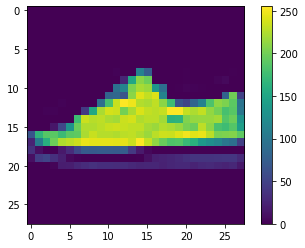

In [ ]:
# How images looks like
plt.figure()
plt.imshow(train_images[1746])
plt.colorbar()
plt.grid(False)
plt.show()

<h3>Data Preprocessing<h3>

The last step before creating our model is to preprocess our data. This simply means apllying some prior ransformation to our data before feeding it the model. In this case we will simply scale all of our greyscale pixel values (0-255) to be between 0 nd . We can do this by dividing each value in the raining and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values

In [ ]:
train_images = train_images /255.0
test_images = test_images /255.0

<h3>Building the model<h3>
We are going to use a keras sequential model with three diffreten layers. This model reperesents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and it's architecutre below


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # input layer
    keras.layers.Dense(128, activation="relu"),  # hidden layer
    keras.layers.Dense(10, activation="softmax") # output layer, 10 because we have 10 classes                          
])

<h2>Compile the model<h2>

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h3>Training the model<h3>

In [ ]:
# fit the model = fitting it to the training data
model.fit(train_images, train_labels, epochs=1) # the less epochs - the more overfit model (but not always)

1875/1875 [==============================] - 11s 5ms/step - loss: 0.4973 - accuracy: 0.8237


Accuracy of training data is 91%, but the "true" accuracy we will check by testing our data:

<h3>Evaluating the model<h3>

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) # verbose is what we see as an output, how much info

print('Test accuracy: ', test_acc)
# when accuracy of the testing is lower than accuracy of trainning, this is called overfitting ?? czy jak

313/313 [==============================] - 1s 2ms/step - loss: 0.4263 - accuracy: 0.8451
Test accuracy:  0.8450999855995178


<h3>Make predictions<h3>


Trouser


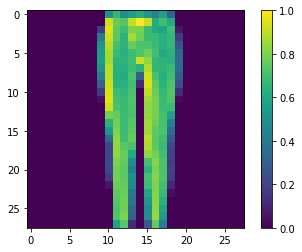

In [ ]:
predictions = model.predict(test_images) # taking into [] is in array when you want take one image to predict [test_images[0]]
print(class_names[np.argmax(predictions[345])])
# argmax is going to return to us the index of the maximum value in the list
plt.figure()
plt.imshow(test_images[345])
plt.colorbar()
plt.grid(False)
plt.show()

<h3>Veryfing predictions<h3>
<h4>Function here is to help us verify predictions with some simple visuals<h4>

Pick a number: 33


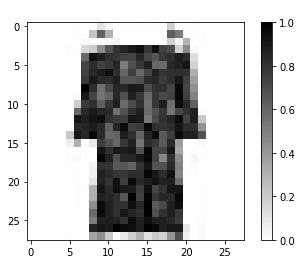

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title('Expected: '+ label)
  plt.xlabel('Guess: '+ guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input('Pick a number: ')
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)

      else:
        print('Try again..')
  
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

# Doesn't show labels on the plot ??

<h2>CONVOLUTIONAL NEURAL NETWORKS <H2>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automoblie', 'bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

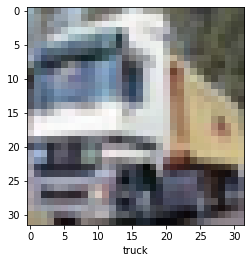

In [ ]:
# Let's look at a one image
IMG_INDEX = 1 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

<h2>CNN ARCHITECTURE<h2>
A common architecutre for CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxpooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the <b>Convolutional Base</b>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

<h3><b>Layer 1</b><h3>
The input shape of our data will be 32, 32, 3 and will process 32 filters of size 3x3 over our input data
<h3><b>Layer 2</b><h3>
This layer will perform the max pooling operation using 2x2 samples and a stride of 2
<h3><b>Other layers</b><h3>
The next set of layers do very similar things but take as input featres map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as i passed the layers, meaning we can afford (computationally) to ass more depth.

In [ ]:
model.summary() # Let's have a look at our model so far
# we have 30x30 not 32x32 because when we do that sampling without padding we get 2 pixels less

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

<h3>Adding dense layers<h3>
So far we have just completed the covolutaional base. Now we need to take these extracted features and add a way to classify them. This is why we add the followint layers t our model.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10 beacuse the amount of classes we have
# flatten and 2 dense layers are the classifier

In [ ]:
model.summary()
# we get 1024 beacuse 4*4*64=1024

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

<h3>Training<h3>

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5223 - accuracy: 0.4461 - val_loss: 1.2568 - val_accuracy: 0.5524
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1617 - accuracy: 0.5869 - val_loss: 1.1618 - val_accuracy: 0.5890
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0096 - accuracy: 0.6464 - val_loss: 0.9639 - val_accuracy: 0.6610
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9081 - accuracy: 0.6794 - val_loss: 0.9074 - val_accuracy: 0.6877
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8288 - accuracy: 0.7099 - val_loss: 0.9173 - val_accuracy: 0.6807
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7710 - accuracy: 0.7306 - val_loss: 0.9271 - val_accuracy: 0.6863
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7181 - accuracy: 0.7477 - val_loss: 0.9239 -

<H3>Evaluating the model<h3>

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 3s - loss: 0.9218 - accuracy: 0.6975 - 3s/epoch - 11ms/step
0.6974999904632568


<h2>Working with small datasets<h2>
Data Augmentation - performing random transformations on our images so that our model can generalize better. These transformation can be things like compressions, rotations, stretches and even color changes

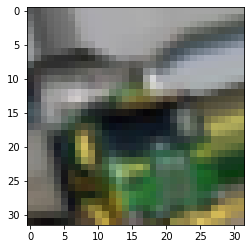

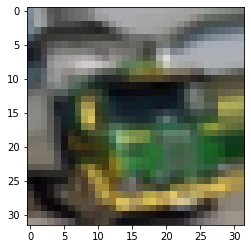

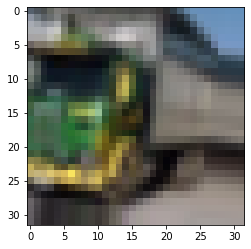

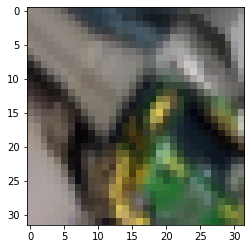

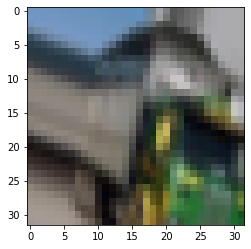

In [ ]:
from keras.preprocessing import image
from keras.preprocessing. image import ImageDataGenerator

# create a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# pick an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'): # this loops runs forever until we break, saving images to current directory
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4: # show 4 images
      break

plt.show()

<h2>Using pretrained model<h2>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

Loading the cats_vs_dogs datest from te module tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training and 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised=True,
)

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteYRBFZR/cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


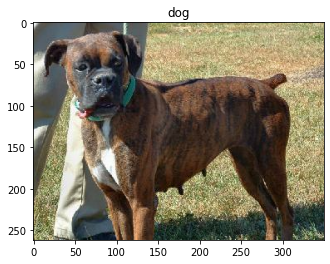

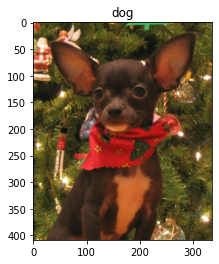

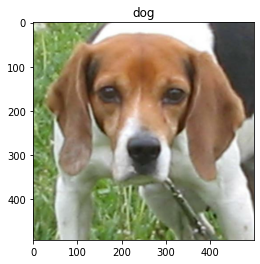

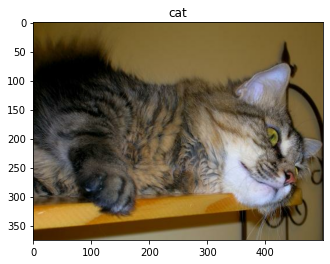

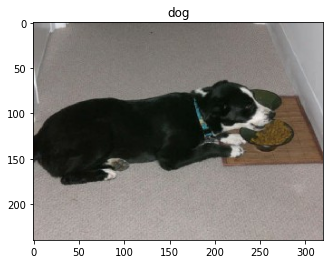

In [ ]:
get_label_name = metadata.features['label'].int2str # creates a function object that we can use to get labels

#display 2 images from the dataset
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
# Reshaping images
IMG_SIZE = 160 # all images will be resized to 160x160

def format_example(image, label):
  '''
  returns an image that is reshaped to IMG_SIZE
  '''
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1 
  image - tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
# applying this function to our images using map
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

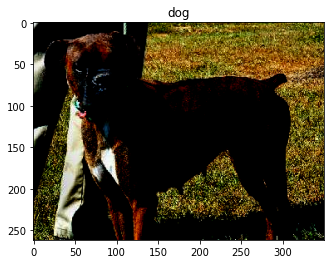

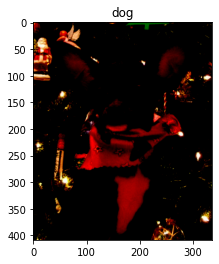

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [ ]:
for img, label in raw_train.take(2):
  print("Original shape: ", img.shape)

for img, label in train.take(2):
  print("New shape: ", img.shape)

Original shape:  (262, 350, 3)
Original shape:  (409, 336, 3)
New shape:  (262, 350, 3)
New shape:  (409, 336, 3)


<h2> Above functions are not working??<h2>

<h2>Picking a pretrained model</h2>
Model we're going to use i the <b>MobileNet V2</b> developed at Google. This mondel is trained on 1.4 mln images and has 1000 diffrent classes.
We want use this model but only it's convolutinal base. So wen we load in the model we'll specify that we don;t want to load the top (classficiation) layer. We'll tell the model what input shape to expect to use the predetermined weights from <b>imagenet</b> (Google set)

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

At this point this base_model will simply output a shape(32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/feature,

In [ ]:
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

NameError: ignored

Freezing the base
"Freeze" refers to disabling the training property of a layer


In [ ]:
base_model.trainable=False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

Adding our classifier. Instead of flattening the feature map of the base layer we will use global avearge pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Adding prediction layer that will be single dense neuorn. We can do that because we have only two classes to predict for

In [ ]:
prediction_layer = keras.layers.Dense(1)

Combining these layers together

In [ ]:
model = tf.keras.Sequential([
                             base_model, 
                             global_average_layer,
                             prediction_layer
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


<h2>Training the model</h2>
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# we can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps = 20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation steps)

SyntaxError: ignored

In [ ]:
# now we can train i on our images
history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data = validation_batches)

acc = history.history['accuracy']
print(acc)

NameError: ignored

In [ ]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

<h1>Check Object Detection API in Tensorflow</h1>

<h1>RECURRENT NEURAL NETWORK RNN<H1>


Example of bag of words

In [3]:
vocab = {} # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words= text.lower().split(" ") # create a list of all of the words in the text, well assume there is no...
  bag = {} # stores all of the encoding and their frequency

  for word in words:
    if word in vocab:
      encoding = vocab[word] # get encoding from vocab
    else:
      vocab[word] = word_encoding
      encoding = word_encoding
      word_encoding += 1

    if encoding in bag:
      bag[encoding] += 1
    else:
      bag[encoding] = 1

    return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)
print(vocab)

{1: 1}
{'this': 1}
